# Python Week 3 Lab

In [25]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Principles of Data Science\accord_sedan.csv")
df

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic
...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic
413,10995,69775,2006,ex,4 Cyl,Automatic
414,16000,77997,2006,exl,4 Cyl,Automatic
415,14700,61892,2006,ex,4 Cyl,Automatic


{'whiskers': [<matplotlib.lines.Line2D at 0x14a6eb02220>,
 'caps': [<matplotlib.lines.Line2D at 0x14a6eb027f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a6eaf7f10>],
 'medians': [<matplotlib.lines.Line2D at 0x14a6eb02d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a6eb110a0>],
 'means': []}

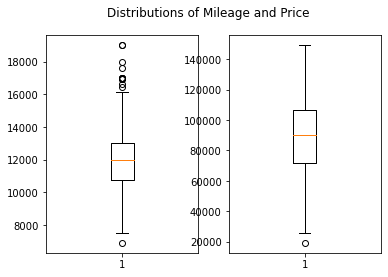

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Distributions of Mileage and Price')
ax1.boxplot(df.price)
ax2.boxplot(df.mileage)

In [24]:
df.describe()

,price,mileage,year
count,417.000000,417.000000,417.0
mean,12084.242206,89725.779376,2006.0
std,2061.430034,25957.872271,0.0
min,6900.000000,19160.000000,2006.0
25%,10779.000000,71844.000000,2006.0
50%,11995.000000,89900.000000,2006.0
75%,13000.000000,106705.000000,2006.0
max,18995.000000,149269.000000,2006.0


In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
min_threshold_price = Q1.price - (1.5 * IQR.price)
min_threshold_price
max_threshold_price = Q3.price + (1.5 * IQR.price)
max_threshold_price
outliers_df_1 = df[df.price < min_threshold_price]
outliers_df_1

,price,mileage,year,trim,engine,transmission
234,6900,134450,2006,exl,4 Cyl,Manual


In [75]:
outliers_df_2 = df[df.price > max_threshold_price]
outliers_df_2

,price,mileage,year,trim,engine,transmission
78,16990,57052,2006,ex,6 Cyl,Automatic
84,16595,80390,2006,ex,6 Cyl,Automatic
138,16988,33034,2006,ex,6 Cyl,Automatic
171,17591,52604,2006,ex,4 Cyl,Automatic
200,16995,48226,2006,ex,6 Cyl,Automatic
227,16420,25543,2006,ex,6 Cyl,Automatic
259,17975,84504,2006,ex,6 Cyl,Automatic
270,18988,19160,2006,ex,4 Cyl,Automatic
312,16950,27098,2006,ex,6 Cyl,Automatic
313,16900,129000,2006,ex,6 Cyl,Automatic


In [76]:
outliers_price = pd.concat([outliers_df_1, outliers_df_2])
outliers_price

,price,mileage,year,trim,engine,transmission
234,6900,134450,2006,exl,4 Cyl,Manual
78,16990,57052,2006,ex,6 Cyl,Automatic
84,16595,80390,2006,ex,6 Cyl,Automatic
138,16988,33034,2006,ex,6 Cyl,Automatic
171,17591,52604,2006,ex,4 Cyl,Automatic
200,16995,48226,2006,ex,6 Cyl,Automatic
227,16420,25543,2006,ex,6 Cyl,Automatic
259,17975,84504,2006,ex,6 Cyl,Automatic
270,18988,19160,2006,ex,4 Cyl,Automatic
312,16950,27098,2006,ex,6 Cyl,Automatic


In [85]:
min_threshold_mileage = Q1.mileage - (1.5 * IQR.mileage)
max_threshold_mileage = Q3.mileage + (1.5 * IQR.mileage)
outliers_mileage_1 = df[df.mileage > max_threshold_mileage]
outliers_mileage_2 = df[df.mileage < min_threshold_mileage]

In [86]:
outliers_mileage_2

,price,mileage,year,trim,engine,transmission
270,18988,19160,2006,ex,4 Cyl,Automatic


In [40]:


outliers = df[(np.abs(stats.zscore(df.price)) > 3)]
#Outliers are within 3/three standard deviations from the rest of the code
#Discarding outliers is key towards data cleaning
#Returning a dataframe which is greater than 3 z-scores will only give the 
#outliers
outliers

,price,mileage,year,trim,engine,transmission
270,18988,19160,2006,ex,4 Cyl,Automatic
379,18995,64570,2006,ex,6 Cyl,Automatic


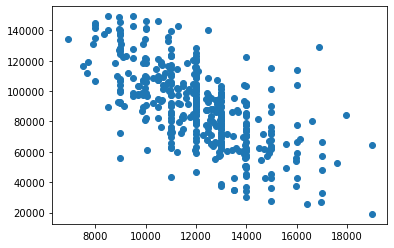

In [45]:
plt.scatter(df.price, df.mileage)

In [88]:
outliers_array = outliers.to_numpy()
outliers_array

array([[18988, 19160, 2006, 'ex', '4 Cyl', 'Automatic'],
       [18995, 64570, 2006, 'ex', '6 Cyl', 'Automatic']], dtype=object)

In [19]:
def estimate_gaussian(dataset):

    mu = np.mean(df) # moyenne cf mu
    sigma = np.std(df) # écart_type/standard deviation
    limit = sigma * 1.5

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

In [20]:
mu, sigma, min_threshold, max_threshold = estimate_gaussian(df.values)

condition1 = (df < min_threshold)
condition2 = (df > max_threshold)

outliers1 = np.extract(condition1, df)
outliers2 = np.extract(condition2, df)
outliers = np.concatenate((outliers1, outliers2), axis=0)

C:\Users\rgs88\AppData\Local\Temp\ipykernel_19844\1874054894.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition1 = (df < min_threshold)
C:\Users\rgs88\AppData\Local\Temp\ipykernel_19844\1874054894.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  condition2 = (df > max_threshold)


In [21]:
df_red = df[df.values==outliers]

plt.scatter(df.index,df.values)
plt.scatter(df_red.index,df_red.values,c='red')
plt.show()

C:\Users\rgs88\AppData\Local\Temp\ipykernel_19844\2149891984.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  df_red = df[df.values==outliers]


KeyError: False

In [ ]:
df['isOutlierPrice'] = 